In [1]:
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import torch
import transformers
import scipy as sp
import pandas as pd

In [16]:
textfile = "../shapdata/cnn.csv"

In [17]:
# load file into a dataframe
df = pd.read_csv(textfile)

In [18]:
# load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-uncased"
)
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

In [19]:
# define a prediction function
def f(x):
    tv = torch.tensor(
        [
            tokenizer.encode(v, padding="max_length", max_length=500, truncation=True)
            for v in x
        ]
    ).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # use one vs rest logit units
    return val

In [20]:
# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

In [21]:
texts = df['text'].tolist()
texts = [t for t in texts[0].split(".")]

In [22]:
shap_values = explainer(texts, fixed_context=1)

In [23]:
len(shap_values)

42

In [26]:
# plot the first sentence's explanation
shap.plots.text(shap_values[1])

In [ ]:
# plot the first sentence's explanation
shap.plots.text(shap_values[1:3])


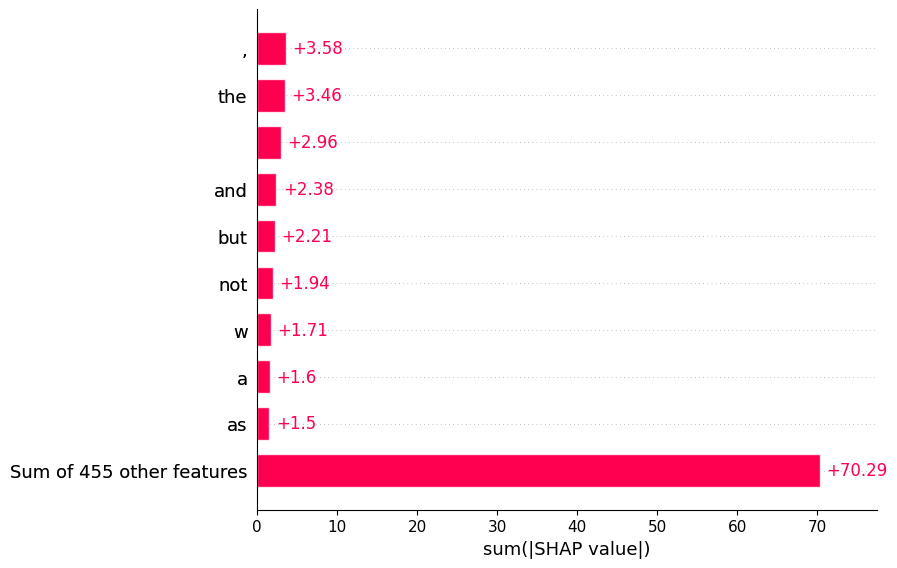

In [31]:
shap.plots.bar(shap_values.abs.sum(0))

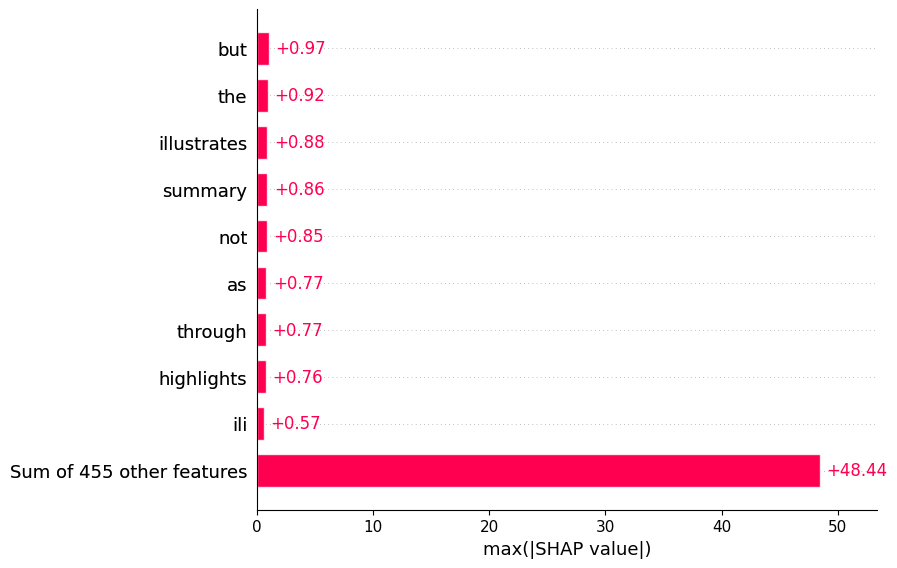

In [32]:
shap.plots.bar(shap_values.abs.max(0))

In [89]:
# author: Lucien Wirz

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import sklearn
import os
import spacy
# Load spaCy English model
# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("de_core_news_sm")

def remove_stop_words(text):

    # Process the text using spaCy
    doc = nlp(text)
 
    # Remove stopwords
    filtered_words = [token.text for token in doc if not token.is_stop]
 
    # Join the filtered words to form a clean text
    clean_text = ' '.join(filtered_words)

    return clean_text


df = pd.read_csv("../shapdata/20min.csv")
persona = "create"

# return the first column as a list where "persona" is "human"
texts_human = df[df['persona'] == 'human']['text'].tolist()
texts_human = [text.replace("[REF]", "") for text in texts_human]
texts_persona = df[df['persona'] == persona]['text'].tolist()

# combine the two lists
texts = texts_human + texts_persona
print(texts[0])
texts = [remove_stop_words(t) for t in texts]

# labels for the two classes as a list
# y = [0] * len(texts_human) + [1] * len(texts_continue)

# return the list of the second column where "persona" is "human" and "continue"
# y = df[df['persona'].isin(['human', persona])]['persona'].tolist()
# labels for the two classes as a list
y = [0] * len(texts_human) + [1] * len(texts_persona)


corpus_train, corpus_test, y_train, y_test = train_test_split(
    texts, y, test_size=0.2, random_state=7
)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(
    corpus_train
).toarray()  
X_test = vectorizer.transform(corpus_test).toarray()


model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

print(y_test)

print(classification_report(y_test, model.predict(X_test)))

Die «Plane People» blieben fünf Tage lang in Kanada Im Verlauf jenes Dienstags kamen insgesamt 38 Flugzeuge in Gander an, der 36. war Flug Nummer 5 mit Continental Airlines von London nach Houston. 7000 Personen strandeten in dem kleinen Ort mit 10’000 Einwohnern. Stunden vergingen, bis alle ihre Flieger verlassen durften. Das Gepäck mussten die Gestrandeten an Bord lassen. Die Passagiere wurden auf unterschiedliche Unterkünfte in der Umgebung verteilt. Was an dem Tag geschehen war, realisierten viele erst später. «Ich hatte zuerst gedacht, es seien technische Probleme. Als ich dann all die anderen Flieger sah, realisierte ich, dass es mehr war», erinnert sich Nick. Von den Ortsansässigen wurden die Neuankömmlinge schnell angenommen und mit dem Titel «Plane People» versehen. Sie luden sie in den darauffolgenden Tagen zu Ausflügen ein und veranstalteten gar eine Party. Auf dieser lernten sich Nick und Diane kennen. Die beiden verliebten sich. Er, Brite, Ende 50, war aus geschäftlichen G

KeyboardInterrupt: 

In [84]:
explainer = shap.Explainer(
    model, X_train,feature_names=vectorizer.get_feature_names_out()
)
shap_values = explainer(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


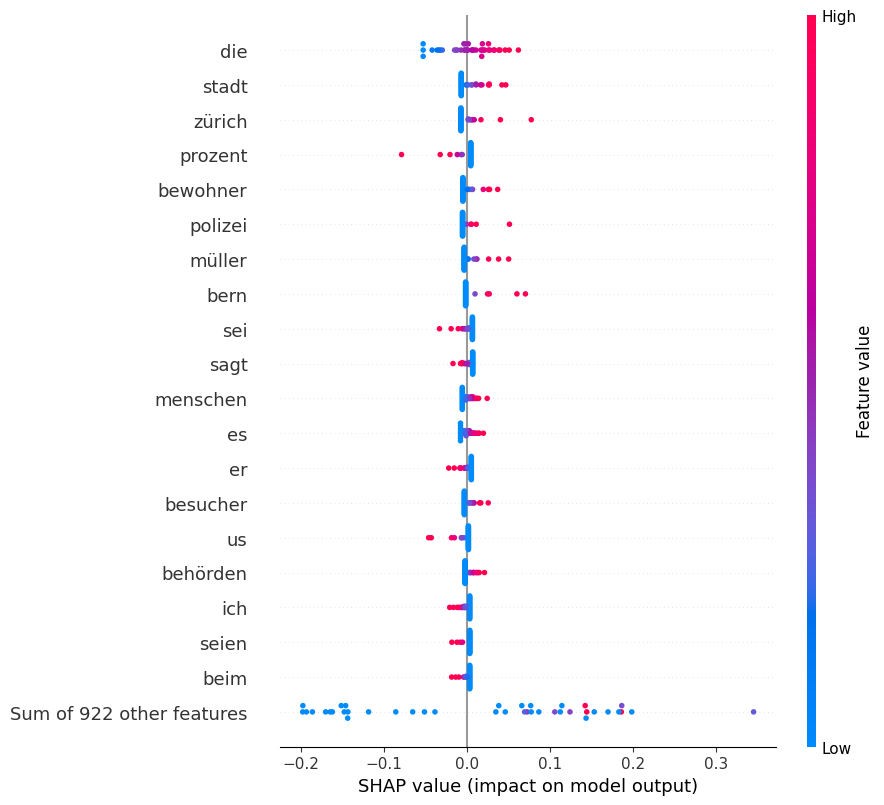

In [85]:
shap.plots.beeswarm(shap_values, max_display=20)

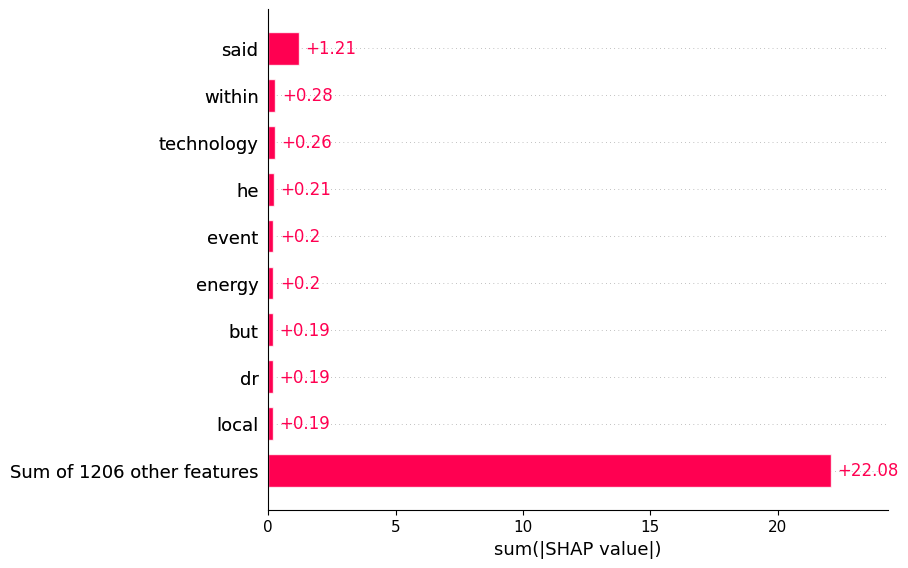

In [80]:
shap.plots.bar(shap_values.abs.sum(0))

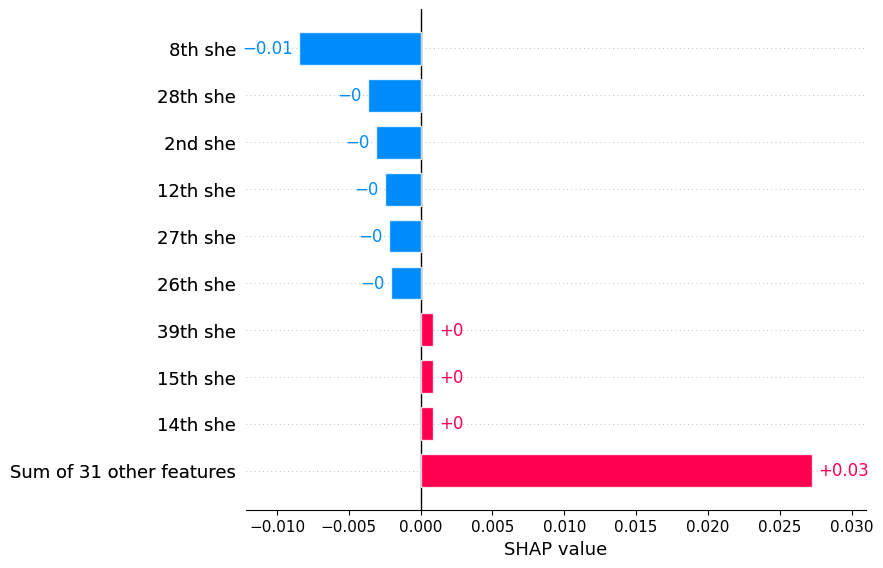

In [81]:
shap.plots.bar(shap_values[:, "she"])

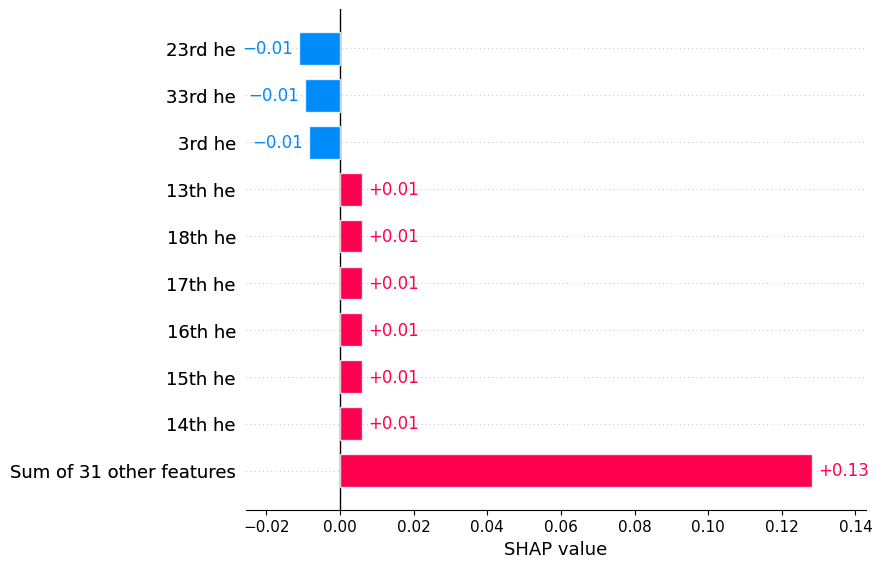

In [82]:
shap.plots.bar(shap_values[:, "he"])